In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading the dataset
df = pd.read_excel('ts_data.xlsx',header=0, index_col=0)

In [3]:
# this dataset has 10,000 records
df.head()

,Value
Time,
1,0.000000
2,-0.090263
3,0.749995
4,1.247887
5,0.131282


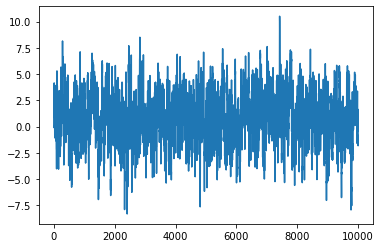

In [4]:
plt.plot(df['Value'])

In [5]:
# checking whether it is a stationary time series or not

In [6]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf

In [7]:
x = df['Value'].values
# ADF checks for stationarity of time series
result = adfuller(x)
print('ADF statistic',result[0])
print('p-value',result[1])
print('critical values:')
for key,value in result[4].items():
    print(key,value)
if result[0] < result[4]["5%"]:
    print("Time series is stationary")
else:
    print("Time Series is not stationary")

ADF statistic -22.184930227348676
p-value 0.0
critical values:
1% -3.4310041633725734
5% -2.861829101294412
10% -2.566923883481157
Time series is stationary


# Time Series is stationary so we can apply AR model

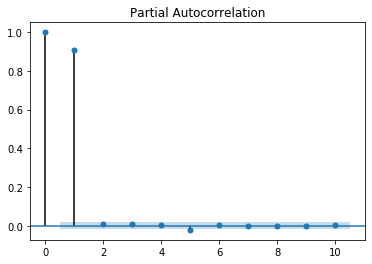

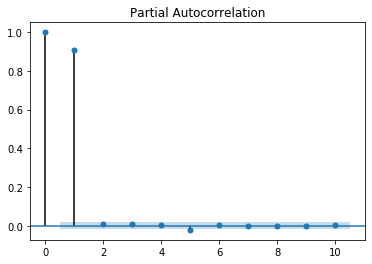

In [8]:
plot_pacf(x,lags = 10)

In [9]:
# splitting the train and test
train,test = x[1:len(x)-2000],x[len(x)-2000:]

In [10]:
len(x),len(train),len(test)

(10000, 7999, 2000)

In [11]:
from statsmodels.tsa.ar_model import AutoReg

# yt=β0+β1yt−1+ϵt

In [12]:
# AR model from statsmodel with lags = 1 as observed from plot
model = AutoReg(train, lags=1)

In [13]:
model_fit = model.fit()

In [14]:
# coeficients we get after fitting
coef = model_fit.params
print('Coefficients: ',coef)

Coefficients:  [0.06870286 0.90550621]


In [15]:
# getting the previous values (t-1)
lags = 1   # it defines how many previous values we need depending on lag
history = train[len(train)-lags:]
history = [history[i] for i in range(len(history))]
predictions = list()

In [16]:
# getting predictions using equation
for t in range(len(test)):
    length = len(history)
    previous_values = [history[i] for i in range(length-lags,length)]
    y_pred = coef[0]
    for d in range(lags):
        y_pred += coef[d+1] * previous_values[lags-d-1]
    y_true = test[t]
    predictions.append(y_pred)
    history.append(y_true)
    print('predicted= ',y_pred,'expected= ',y_true)

predicted=  1.861527011832145 expected=  1.96762098737594
predicted=  1.850395874276683 expected=  2.04572614136137
predicted=  1.9211205758933099 expected=  2.56556053022029
predicted=  2.3918338408459277 expected=  3.88453380817107
predicted=  3.5861723289407688 expected=  2.54736240958782
predicted=  2.3753553296844885 expected=  1.84828289390388
predicted=  1.7423344900832272 expected=  2.13184703281371
predicted=  1.9991035775280148 expected=  1.96578516416932
predicted=  1.8487335249708574 expected=  1.39111794549384
predicted=  1.3283687923533156 expected=  2.27808937142821
predicted=  2.1315269226526863 expected=  1.6592403371903
predicted=  1.5711552818723797 expected=  2.08610280591925
predicted=  1.9576818962085274 expected=  2.23815184402763
predicted=  2.095363243758477 expected=  2.25144306006574
predicted=  2.1073985223598455 expected=  2.47483313052095
predicted=  2.3096796174078014 expected=  2.82632924946554
predicted=  2.6279615343270857 expected=  3.64223961770872
p

predicted=  -1.5451738000869557 expected=  -2.31341645692207
predicted=  -2.026110097583567 expected=  -2.08805555977196
predicted=  -1.8220444067333819 expected=  -2.12514529923765
predicted=  -1.8556293959805537 expected=  -2.80230754761004
predicted=  -2.468804014023243 expected=  -1.7637003173374
predicted=  -1.528338721917086 expected=  0.0843880760337845
predicted=  0.14511678662349858 expected=  -0.544144658096761
predicted=  -0.4240235045019488 expected=  -0.548056020092701
predicted=  -0.42756526706129383 expected=  -1.08490169267062
predicted=  -0.9136823549852666 expected=  -0.120109911671899
predicted=  -0.04005741025963018 expected=  0.0752688728491436
predicted=  0.13685929155044063 expected=  1.06788634874474
predicted=  1.0356805756780059 expected=  2.18503539420682
predicted=  2.047265968830729 expected=  2.90010764805996
predicted=  2.6947683320874014 expected=  1.5957105184646
predicted=  1.5136286367809217 expected=  3.77113330323282
predicted=  3.4834874680104817 e

predicted=  -1.0523792635236162 expected=  -1.8287141460762
predicted=  -1.5872091472844552 expected=  -2.64000430083613
predicted=  -2.3218374168939953 expected=  -1.47076578750676
predicted=  -1.2630846873453898 expected=  -0.216834198194881
predicted=  -0.1276418519303442 expected=  0.197880374291873
predicted=  0.24788476697452463 expected=  -0.918042465702376
predicted=  -0.7625902895178391 expected=  0.766887436670365
predicted=  0.7631241929409506 expected=  -0.322041203965402
predicted=  -0.22290744851935881 expected=  -1.30550075261762
predicted=  -1.1134361726983766 expected=  -2.2895218476111
predicted=  -2.004473380574092 expected=  -3.99602984528383
predicted=  -3.5497269622302476 expected=  -3.35536828340215
predicted=  -2.9696039423105076 expected=  -2.61554708582557
predicted=  -2.2996912569322823 expected=  -2.70731532732373
predicted=  -2.382787969078201 expected=  -1.4093965879377
predicted=  -1.2075144963080269 expected=  -1.33831212799353
predicted=  -1.14314707671

predicted=  -1.852661424142892 expected=  -3.06249611182069
predicted=  -2.704406373520409 expected=  -4.15025846931261
predicted=  -3.689381938356576 expected=  -3.45040015330016
predicted=  -3.05565589022499 expected=  -5.0360901895701
predicted=  -4.4915080580930695 expected=  -4.86287691202211
predicted=  -4.334662360395517 expected=  -4.77364133262288
predicted=  -4.253858989496655 expected=  -2.95957392748291
predicted=  -2.6112096969172383 expected=  -3.54606104582399
predicted=  -3.142277422030563 expected=  -1.81179796890485
predicted=  -1.5718914438821816 expected=  -1.3164608627777
predicted=  -1.123360620461473 expected=  -1.69753374392053
predicted=  -1.468424479090349 expected=  -1.98830526216107
predicted=  -1.7317198932446054 expected=  -1.23881818919637
predicted=  -1.0530546977206885 expected=  -0.26143241350049
predicted=  -0.16802581264453312 expected=  -0.988759554292269
predicted=  -0.8266250520720458 expected=  -0.594439192334625
predicted=  -0.46956551735789553 

predicted=  2.9361704960684305 expected=  2.88929227301596
predicted=  2.684974942870071 expected=  2.64617719322399
predicted=  2.4648327294638084 expected=  2.61422137782031
predicted=  2.435896540313437 expected=  2.64253282908626
predicted=  2.4615327351219327 expected=  3.28731688275248
predicted=  3.045388696934764 expected=  2.5106711546437
predicted=  2.3421311706444006 expected=  2.47011097000945
predicted=  2.3054036717611934 expected=  2.76853991213799
predicted=  2.5756329307643044 expected=  0.545092683943582
predicted=  0.5622876679958559 expected=  0.0411625003720085
predicted=  0.10597575962473837 expected=  1.02448176152183
predicted=  0.9963774525997796 expected=  2.73316141398677
predicted=  2.5435974811465214 expected=  3.71498773463027
predicted=  3.4326473072286214 expected=  4.49436672207259
predicted=  4.138379816806791 expected=  2.8093368033085
predicted=  2.6125747688849814 expected=  1.44263057112086
predicted=  1.3750137945210295 expected=  1.43360677827862

predicted=  2.0830009906428186 expected=  2.94961124772611
predicted=  2.7395941487805033 expected=  2.17878026599378
predicted=  2.04160191141752 expected=  2.15925391783203
predicted=  2.02392068198598 expected=  0.859254004638513
predicted=  0.8467626934183682 expected=  0.861580768198949
predicted=  0.8488695922611126 expected=  1.20878828070722
predicted=  1.163268149439292 expected=  0.0260172282452886
predicted=  0.09226162172975777 expected=  -0.0707230307141415
predicted=  0.00466271691872279 expected=  1.2320716470348
predicted=  1.1843513821342293 expected=  2.27960536986071
predicted=  2.1328996686408686 expected=  2.0219277191849
predicted=  1.8995709569310153 expected=  1.88640054871744
predicted=  1.7768502630566407 expected=  1.7807142712985
predicted=  1.6811506830158547 expected=  -0.330322768235611
predicted=  -0.23040645635741666 expected=  0.318326398061658
predicted=  0.3569493889278501 expected=  0.670905740773603
predicted=  0.6762121716904372 expected=  0.79253

predicted=  0.6605767006979583 expected=  1.2315964378624
predicted=  1.1839210772797026 expected=  0.609944902269034
predicted=  0.6210117541310621 expected=  0.356525622979628
predicted=  0.3915390241369916 expected=  1.03339883528925
predicted=  1.0044519182312266 expected=  0.970841476244888
predicted=  0.9478058414158346 expected=  0.266923864494186
predicted=  0.31040407580323515 expected=  0.460764440776393
predicted=  0.48592792050766376 expected=  0.0297603989413134
predicted=  0.09565108602331565 expected=  1.56443240019909
predicted=  1.4853061065946238 expected=  1.27264000706444
predicted=  1.2210862838886947 expected=  2.23126585792571
predicted=  2.089127940612088 expected=  0.46596556422337
predicted=  0.49063757006455866 expected=  2.22974728676701
predicted=  2.087752865004367 expected=  1.78318933462426
predicted=  1.6833918682163767 expected=  -0.134067496637428
predicted=  -0.05269609005994019 expected=  -0.270579778986547
predicted=  -0.17630880885628497 expected=

predicted=  0.25133657625028083 expected=  -0.0720749611867583
predicted=  0.0034385354863414597 expected=  0.674763109249882
predicted=  0.6797050427826715 expected=  -0.370782135343436
predicted=  -0.2670426643448215 expected=  -0.0364188409136774
predicted=  0.03572537365825809 expected=  0.283833705467882
predicted=  0.32571604173921376 expected=  -0.418269235381913
predicted=  -0.3100425281116441 expected=  0.247738248214957
predicted=  0.29303138120573535 expected=  0.436356076607844
predicted=  0.46382599528653656 expected=  0.281182646543351
predicted=  0.3233154914318611 expected=  0.194703834846616
predicted=  0.24500839079477654 expected=  1.83839109029686
predicted=  1.7333774005333205 expected=  0.260769218792614
predicted=  0.3048310059277064 expected=  1.79338533243635
predicted=  1.6926244075066565 expected=  1.03482320947688
predicted=  1.005741697897103 expected=  -0.198758618710525
predicted=  -0.11127430253895351 expected=  0.736841351276566
predicted=  0.7359172761

predicted=  0.42868662224156306 expected=  -0.163292425528977
predicted=  -0.0791594445270156 expected=  0.930623718110604
predicted=  0.9113884118532795 expected=  -0.852612741371682
predicted=  -0.7033432681111632 expected=  -2.02973581509175
predicted=  -1.7692355160213151 expected=  -1.52241384935902
predicted=  -1.3098523278555103 expected=  -0.65731833099509
predicted=  -0.5265029676124776 expected=  -0.357901377512615
predicted=  -0.25537905819725804 expected=  -1.22937503774669
predicted=  -1.0445038654833714 expected=  -2.55692556420495
predicted=  -2.2466091053279924 expected=  -1.54173199920119
predicted=  -1.3273450324166922 expected=  -0.195953632945673
predicted=  -0.10873437052249463 expected=  0.289940119564287
predicted=  0.3312454375969617 expected=  -2.5585127126005
predicted=  -2.2480462780492387 expected=  -1.85585130875323
predicted=  -1.6117820164886159 expected=  -1.57798657594031
predicted=  -1.3601737766323387 expected=  -0.267921822578891
predicted=  -0.17390

predicted=  0.6281449369626702 expected=  0.241848711742748
predicted=  0.28769836938253446 expected=  0.193446732004486
predicted=  0.24387007637025546 expected=  0.913881404503331
predicted=  0.8962281429871909 expected=  1.25908303138979
predicted=  1.2088103582872634 expected=  2.63430017996062
predicted=  2.4540780202508254 expected=  2.97847889624338
predicted=  2.7657339836515598 expected=  2.91159751969278
predicted=  2.7051724821515073 expected=  3.00919466724209
predicted=  2.793547304898115 expected=  3.37539457586329
predicted=  3.1251435946141783 expected=  -0.0450305770277288
predicted=  0.027927393166714193 expected=  0.0330289032601466
predicted=  0.09861073696677652 expected=  0.117060886862424
predicted=  0.1747022195804976 expected=  -0.460064915872694
predicted=  -0.34788877615983027 expected=  0.448769062321498
predicted=  0.4750660308792377 expected=  1.60953624375411
predicted=  1.526147916826339 expected=  1.66945280708112
predicted=  1.5804027367321676 expected

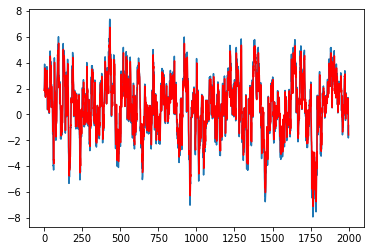

In [17]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

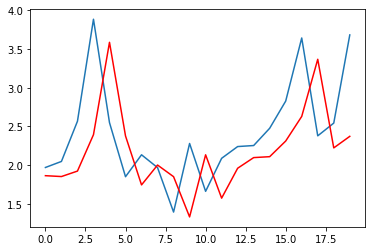

In [18]:
plt.plot(test[:20])
plt.plot(predictions[:20],color='r')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: ',rmse)

Test RMSE:  0.9636675252835892
